In [1]:
import os
import numpy as np
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
import ast

['test_all.csv', 'test_all_wrong.csv', 'test_conform.csv', 'test_conform_wrong.csv', 'test_epi.csv', 'test_epi_wrong.csv', 'test_evdl.csv', 'test_evdl_wrong.csv', 'test_majority.csv', 'test_majority_wrong.csv', 'test_tta.csv', 'test_tta_wrong.csv', 'val_all.csv', 'val_all_wrong.csv', 'val_conform.csv', 'val_conform_wrong.csv', 'val_epi.csv', 'val_epi_wrong.csv', 'val_evdl.csv', 'val_evdl_wrong.csv', 'val_majority.csv', 'val_majority_wrong.csv', 'val_tta.csv', 'val_tta_wrong.csv']
val_epi.csv: 0.4593691633705351 +/- 0.042769564899064395
val_tta.csv: 0.36163926141866154 +/- 0.03997106512700823
val_conform.csv: 0.40630802051179216 +/- 0.006489361324666686
val_majority.csv: 0.4127146470335539 +/- 0.015557347819071718
val_all.csv: 0.36405993994924657 +/- 0.03576525688896629
val_evdl.csv: 0.35993227926907334 +/- 0.01591497094067627
test_epi.csv: 0.46140453516613017 +/- 0.043154425253410233
test_tta.csv: 0.36714730806156853 +/- 0.018199451157373158
test_conform.csv: 0.4148419215545831 +/- 0.0

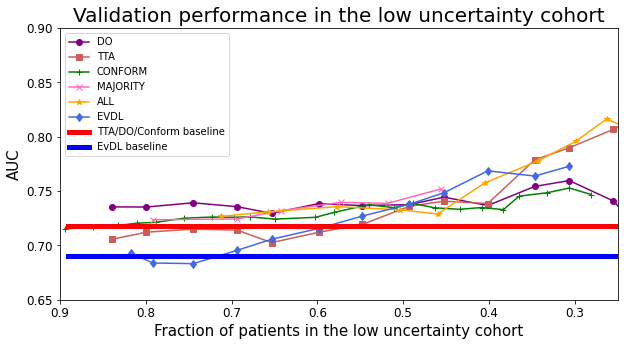

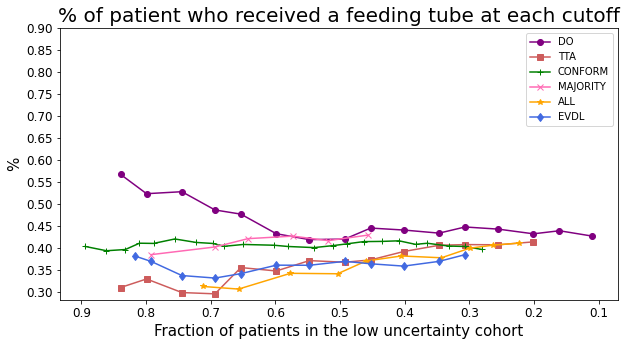

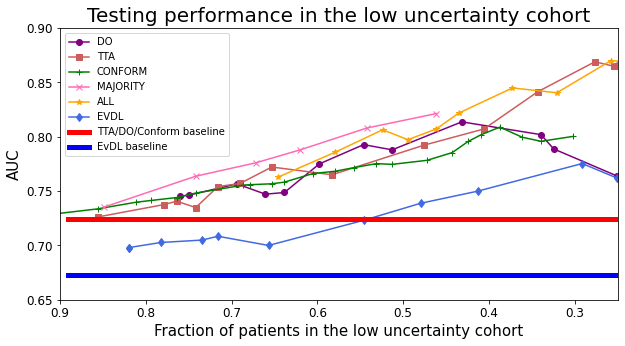

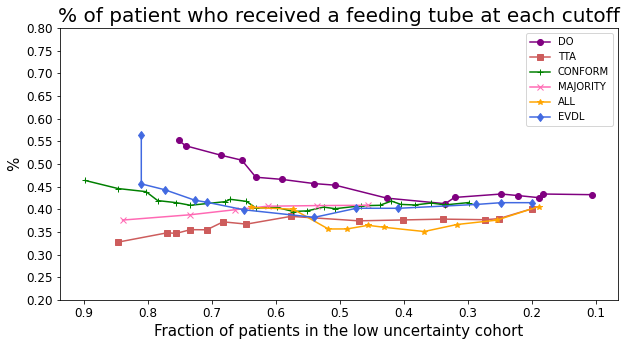

In [5]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_miccai\save_folder'
load_ratio_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_miccai\ratio'

print_ = True

legend_line_color = [('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), 
                     ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')]

legend = []
reorder = [('epi', 0), ('tta', 1), ('conform', 2), ('majority', 3), ('all', 4), ('evdl', 5)]

print(sorted([x for x in os.listdir(load_dir) if 'csv' in x]))

reorder_list = []

for x, _ in reorder:
    reorder_list.extend([y for y in os.listdir(load_dir) if x in y])
# print(reorder_list)


plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.5, 0.95, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.65, 0.9])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')


x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in x], linewidth=5, color='blue')
# plt.plot(x, [save_y[1] for xx in range(len(x))], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Validation performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('AUC', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.yticks(np.arange(0.5, 0.95, 0.05), fontsize=12)
plt.legend(legend)
plt.ylim([0.65, 0.9])
plt.xlim([0.25, 0.9])
plt.gca().invert_xaxis()

# plt.gca().twinx()
# plt.gca().set_ylabel('stupid')

if not print_:
    plt.show()
else:
    plt.savefig('1a val low - rescale.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 0.9, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
#         plt.ylim([0.6, 0.9])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()



####

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
#         plt.yticks(np.arange(0.6, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.yticks(np.arange(0.5, 0.95, 0.05), fontsize=12)
        plt.ylim([0.65, 0.9])
        
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in range(len(x))], linewidth=5, color='blue')
# print(y2, save_y)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.title('Testing performance in the low uncertainty cohort', fontsize=20)
plt.ylabel('AUC', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.yticks(np.arange(0.5, 0.95, 0.05), fontsize=12)
plt.xlim([0.25, 0.9])
plt.ylim([0.65, 0.9])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low - rescale.png', dpi=300)
    
    
###Ratio
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.2, 0.8, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()

####


val_epi_wrong.csv: 0.3928821553213557 +/- 0.018798160818138124
val_tta_wrong.csv: 0.4681777175794238 +/- 0.013645656215208527
val_conform_wrong.csv: 0.45126700909495393 +/- 0.04361632092327627
val_majority_wrong.csv: 0.421760232314302 +/- 0.020860286976113578
val_all_wrong.csv: 0.4533384450339691 +/- 0.006247811546844778
val_evdl_wrong.csv: 0.5172987873898335 +/- 0.0547231501211128
test_epi_wrong.csv: 0.4098751329358503 +/- 0.011196427056830407
test_tta_wrong.csv: 0.5090359252428993 +/- 0.04848745043344798
test_conform_wrong.csv: 0.4519459014714439 +/- 0.028231383369425524
test_majority_wrong.csv: 0.4739687713833825 +/- 0.01738730807119824
test_all_wrong.csv: 0.46676113382553047 +/- 0.02203854093553288
test_evdl_wrong.csv: 0.4516907498672096 +/- 0.03367542785858804


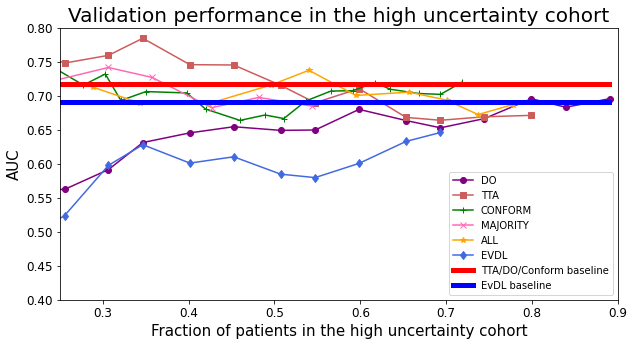

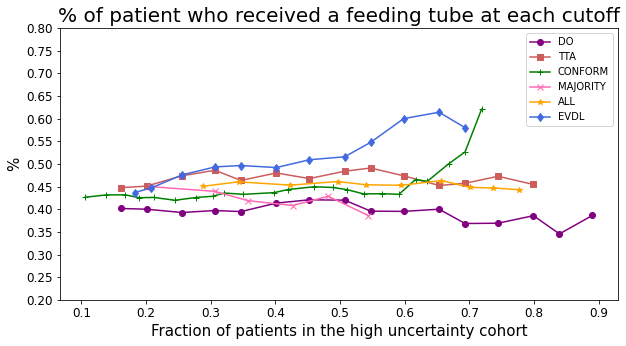

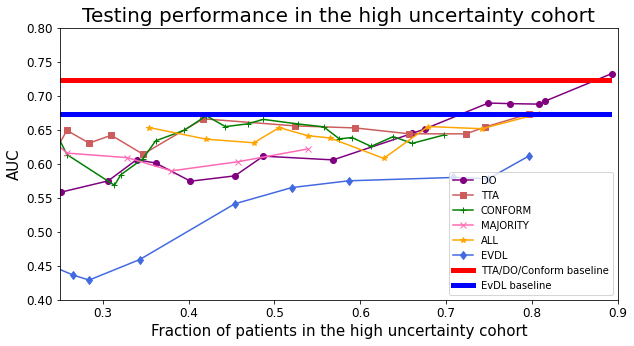

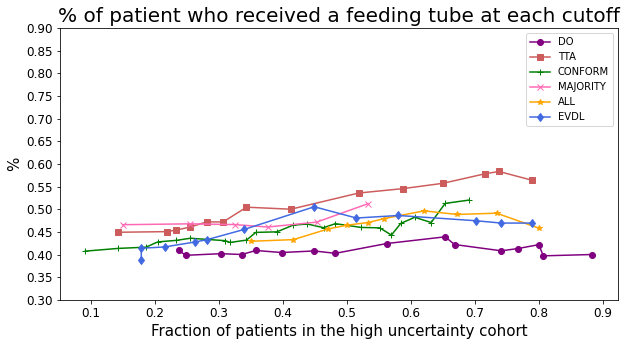

In [3]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_miccai\save_folder'

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274 for x in x]
        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.4, 0.8])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in range(len(x))], linewidth=5, color='blue')
plt.title('Validation performance in the high uncertainty cohort', fontsize=20)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.xlim([0.25, 0.9])
plt.ylim([0.4, 0.8])
# plt.gca().invert_xaxis()
plt.ylabel('AUC', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1c val high - rescale.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.2, 0.8, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
# plt.gca().invert_xaxis()

####

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 1, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlim([0.25, 0.9])
        plt.ylim([0.4, 0.8])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
            
x = list(np.arange(0.25, 0.9, 0.01))
plt.plot(x, [save_later_y[0] for xx in x], linewidth=5, color='red')
plt.plot(x, [save_y[1] for xx in range(len(x))], linewidth=5, color='blue')
# plt.yticks(np.arange(0.6, 85, 0.05))
plt.title('Testing performance in the high uncertainty cohort', fontsize=20)
plt.xlim([0.25, 0.9])
plt.ylim([0.4, 0.8])
# plt.gca().invert_xaxis()
plt.ylabel('AUC', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
legend.extend(['TTA/DO/Conform baseline', 'EvDL baseline'])
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1d test high - rescale.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 0.9, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
# plt.gca().invert_xaxis()

####